![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaimegrp/DS_Online_Oct23_Exercises/main/05_Deep_Learning/Sprint_18/Unidad_01/Practica_Obligatoria/data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.drop(columns=["sex", "class", "adult_male", "deck", "embark_town", "survived"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   who       891 non-null    object 
 7   alive     891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


In [6]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

In [7]:
man = df["who"] == "man"
woman = df["who"] == "woman"
child = df["who"] == "child"

df.loc[man, 'age'] = df.loc[man, 'age'].fillna(df.loc[man, 'age'].mean())
df.loc[woman, 'age'] = df.loc[woman, 'age'].fillna(df.loc[woman, 'age'].mean())
df.loc[child, 'age'] = df.loc[child, 'age'].fillna(df.loc[child, 'age'].mean())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   who       891 non-null    object 
 7   alive     891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  


In [9]:
target = "alive"

df[target].value_counts(True)

alive
no     0.616162
yes    0.383838
Name: proportion, dtype: float64

In [10]:
num_feat = ["age", "sibsp", "parch", "fare"]

In [11]:
cat_feat = []
for col in df.columns:
  if col != target:
    if col not in num_feat:
      cat_feat.append(col)

In [12]:
cat_feat

['pclass', 'embarked', 'who', 'alone']

In [13]:
train, test = train_test_split(df, test_size = .2, random_state = 42)

train.shape, test.shape

((712, 9), (179, 9))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

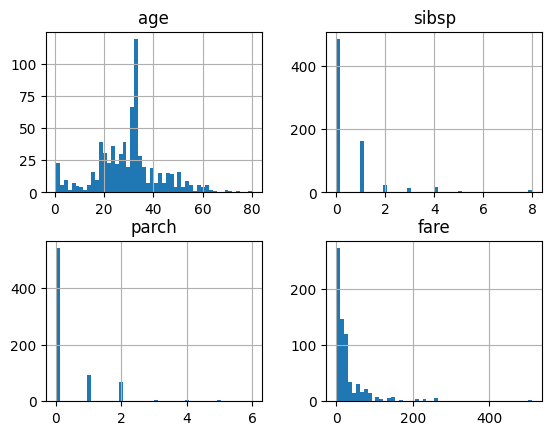

In [14]:
train[num_feat].hist(bins=50)

In [15]:

def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()

    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


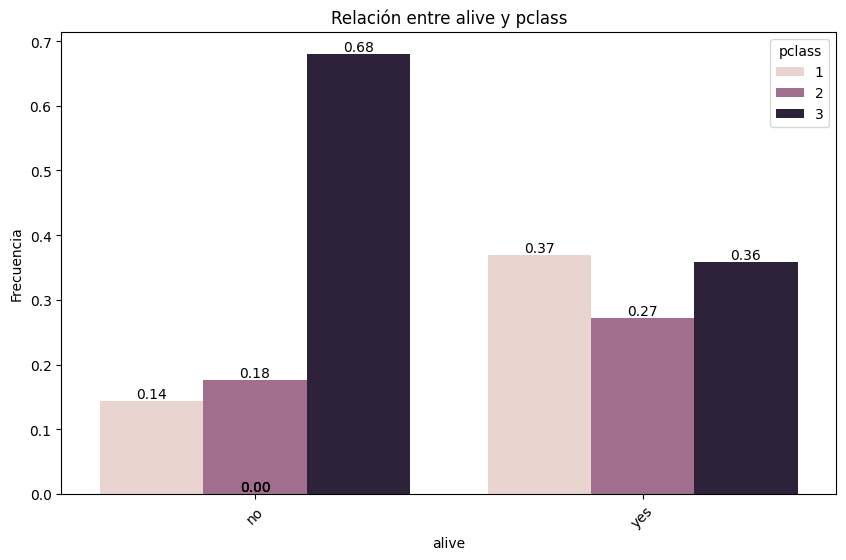

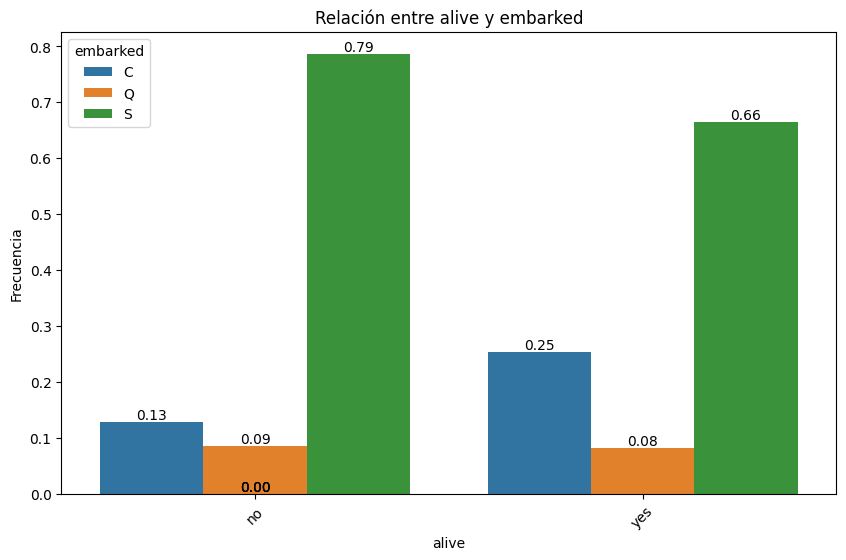

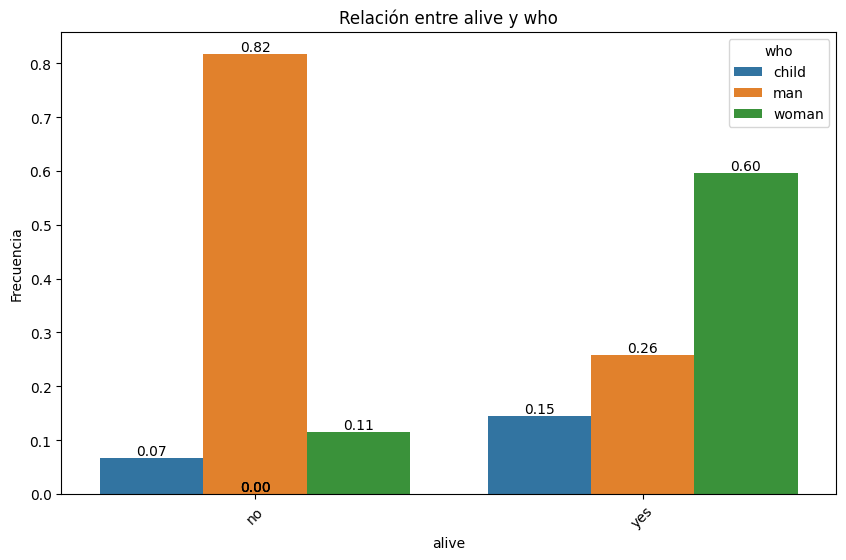

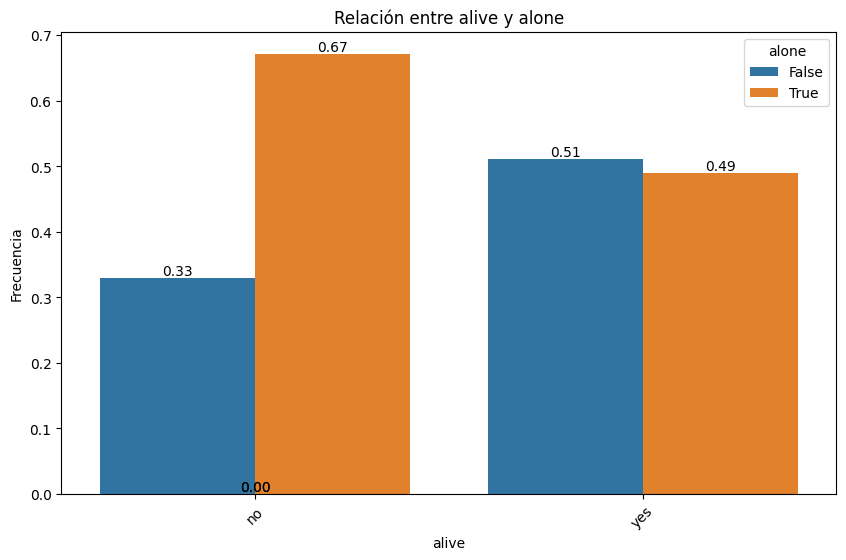

In [16]:
for col in cat_feat:
  if col != target:
    plot_categorical_relationship_fin(train, target, col, True, True)

In [17]:
cat_feat

# a ver qué toca transformar

['pclass', 'embarked', 'who', 'alone']

In [18]:
train["alone"] = train["alone"].astype(int)

test["alone"] = test["alone"].astype(int)

In [19]:
train["who"] = train["who"].map({"child":0,
                                 "woman":1,
                                 "man":2})
test["who"] = test["who"].map({"child":0,
                                 "woman":1,
                                 "man":2})

In [20]:
train["embarked"] = train["embarked"].map({"Q":0,
                                           "C":1,
                                           "S":2})
test["embarked"] = test["embarked"].map({"Q":0,
                                           "C":1,
                                           "S":2})

In [21]:
train[num_feat] = np.log1p(train[num_feat])

In [22]:
X_train = train[num_feat + cat_feat]
X_test = test[num_feat + cat_feat]

y_train = train[target]
y_test = test[target]

In [23]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[num_feat] = scaler.fit_transform(X_train_scaled[num_feat])

In [24]:
X_test_scaled = X_test.copy()
X_test_scaled[num_feat] = scaler.transform(X_test_scaled[num_feat])

In [25]:
rf = RandomForestClassifier(random_state=42)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
train_time = end - start

start = time.time()
y_pred = rf.predict(X_test)
end = time.time()
pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

rf_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['rf']
                            )
rf_metrics

,accuracy,precision,recall,train_time,pred_time
rf,0.608939,0.661705,0.644723,0.177404,0.008681


In [26]:
params = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"]}

rf_grid = GridSearchCV(rf,
                       params,
                       cv=5,
                       n_jobs=-1)

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()
train_time = end - start

start = time.time()
y_pred = rf_grid.predict(X_test)
end = time.time()
pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

rf_grid_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['rf_grid']
                            )
rf_grid_metrics

,accuracy,precision,recall,train_time,pred_time
rf_grid,0.815642,0.823729,0.794981,18.346162,0.006618


In [27]:
rf_grid.best_params_

{'class_weight': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [28]:
ml_metrics = pd.concat([rf_metrics, rf_grid_metrics])
ml_metrics

,accuracy,precision,recall,train_time,pred_time
rf,0.608939,0.661705,0.644723,0.177404,0.008681
rf_grid,0.815642,0.823729,0.794981,18.346162,0.006618


In [29]:
# Creamos un modelo de red neuronal

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
mlp.fit(X_train_scaled, y_train)
end = time.time()
train_time = end - start

start = time.time()
y_pred = mlp.predict(X_test_scaled)
end = time.time()
pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

mlp_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp']
                            )
mlp_metrics

c:\Users\Nur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,train_time,pred_time
mlp,0.413408,0.206704,0.5,1.767303,0.00347


In [30]:
params = {
    'hidden_layer_sizes': [(100,), (50, 50)],  # Tamaños de las capas ocultas
    'activation': ['relu', 'tanh'],                           # Funciones de activación
    'solver': ['adam', 'sgd'],                                    # Solucionadores
    'alpha': [0.0001, 0.001],                               # Término de regularización
    'learning_rate': ['constant', 'adaptive'],               # Tasa de aprendizaje
}

mlp_grid = GridSearchCV(MLPClassifier(max_iter = 100000,random_state=42), params, cv=5)

start = time.time()
mlp_grid.fit(X_train_scaled, y_train)
end = time.time()
train_time = end - start

start = time.time()
y_pred = mlp_grid.predict(X_test_scaled)
end = time.time()
pred_time = end - start

mlp_grid_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp_grid']
                            )
mlp_grid_metrics

c:\Users\Nur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,train_time,pred_time
mlp_grid,0.413408,0.206704,0.5,328.819567,0.001032


In [32]:
dl_metrics = pd.concat([mlp_metrics, mlp_grid_metrics])
dl_metrics

,accuracy,precision,recall,train_time,pred_time
mlp,0.413408,0.206704,0.5,1.767303,0.003470
mlp_grid,0.413408,0.206704,0.5,328.819567,0.001032


In [35]:
metrics = pd.concat([ml_metrics, dl_metrics])
metrics.sort_values(by="recall", ascending=False)

,accuracy,precision,recall,train_time,pred_time
rf_grid,0.815642,0.823729,0.794981,18.346162,0.006618
rf,0.608939,0.661705,0.644723,0.177404,0.008681
mlp,0.413408,0.206704,0.500000,1.767303,0.003470
mlp_grid,0.413408,0.206704,0.500000,328.819567,0.001032


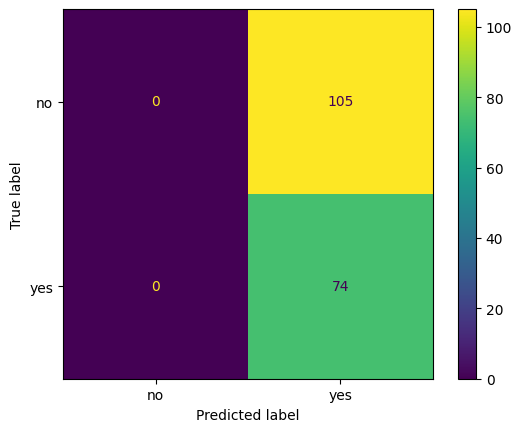

In [41]:
cm = confusion_matrix(y_test, mlp.predict(X_test_scaled), labels=mlp.classes_)
ConfusionMatrixDisplay(cm, display_labels=mlp.classes_).plot()

In [42]:
print(classification_report(y_test, mlp.predict(X_test_scaled)))

              precision    recall  f1-score   support

          no       0.00      0.00      0.00       105
         yes       0.41      1.00      0.58        74

    accuracy                           0.41       179
   macro avg       0.21      0.50      0.29       179
weighted avg       0.17      0.41      0.24       179



c:\Users\Nur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [43]:
y_train.value_counts()

alive
no     444
yes    268
Name: count, dtype: int64

In [44]:
y_test.value_counts()

alive
no     105
yes     74
Name: count, dtype: int64

No entiendo muy bien que ha pasado, estaba pensando en que mlp no tiene un class_weight pero es que todas las predicciones se han ido a la clase minoritaria.
